In [1]:
#importing packages
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.feature as cf
import cartopy .crs as ccrs
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=xr.open_mfdataset({'PERSIANN_Portugal_2023-04-29085841am_2007.nc','PERSIANN_Portugal_2023-04-29085841am_2008.nc','PERSIANN_Portugal_2023-04-29085841am_2009.nc','PERSIANN_Portugal_2023-04-29085841am_2010.nc','PERSIANN_Portugal_2023-04-29085841am_2011.nc','PERSIANN_Portugal_2023-04-29085841am_2012.nc','PERSIANN_Portugal_2023-04-29085841am_2013.nc','PERSIANN_Portugal_2023-04-29085841am_2014.nc','PERSIANN_Portugal_2023-04-29085841am_2015.nc','PERSIANN_Portugal_2023-04-29085841am_2016.nc'})

In [3]:
data_precip=data.precip.where(data.precip != -99., drop=True)

In [4]:
# grouping data by month and year
port_mon_total = data_precip.groupby('datetime.month').sum('datetime')
port_mon_mean = data_precip.groupby('datetime.month').mean('datetime')

port_ann_total = data_precip.groupby('datetime.year').sum('datetime')
port_ann_mean = data_precip.groupby('datetime.year').mean('datetime')

In [5]:
# calculating sum total and mean over months
port_mon_total=port_mon_total.sum(dim=('lon','lat'))
port_mon_mean=port_mon_mean.mean(dim=('lon','lat'))

In [6]:
# converting to dataframe
port_ann_total=port_ann_total.sum(dim=('lon','lat'))
port_ann_total=port_ann_total.to_dataframe()

In [7]:
# replacing outliers with median values
port_ann_total['precip']=np.where(port_ann_total['precip']>3.260923e+40,port_ann_total.median(),port_ann_total['precip'])
port_ann_total['precip']=np.where(port_ann_total['precip']>3.260921e+38,port_ann_total.median(),port_ann_total['precip'])

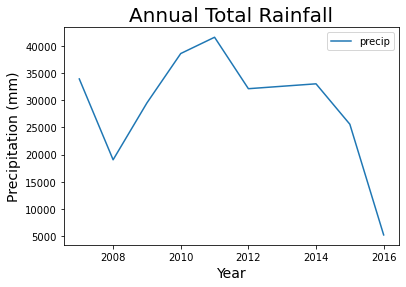

In [8]:
# Annual rain sum timeseries plot
port_ann_total.plot()
plt.xlabel('Year', fontsize=14)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.title('Annual Total Rainfall', fontsize= 20)
plt.savefig('Annual Total Rainfall.jpeg')

In [9]:
# converting to dataframe
port_ann_mean=port_ann_mean.mean(dim=('lon','lat'))
port_ann_mean=port_ann_mean.to_dataframe()

In [10]:
# replacing outliers with median values
port_ann_mean['precip']=np.where(port_ann_mean['precip']>6.053094e+34,port_ann_mean.median(),port_ann_mean['precip'])
port_ann_mean['precip']=np.where(port_ann_mean['precip']>6.053093e+33,port_ann_mean.median(),port_ann_mean['precip'])

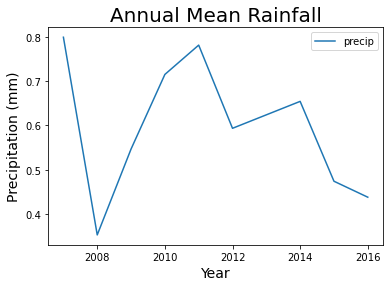

In [11]:
port_ann_mean.plot()
plt.xlabel('Year', fontsize=14)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.title('Annual Mean Rainfall', fontsize= 20)
plt.savefig('Annual Mean Rainfall.jpeg')

# Spatial plots

# R>1

In [12]:
# Selecting the number of wet days
rain1= data_precip.where(data_precip > 1)

# Grouping of data monthly and yearly basis
rain1_mon=rain1.groupby('datetime.month').mean('datetime')
rain1_yr=rain1.groupby('datetime.year').mean('datetime')

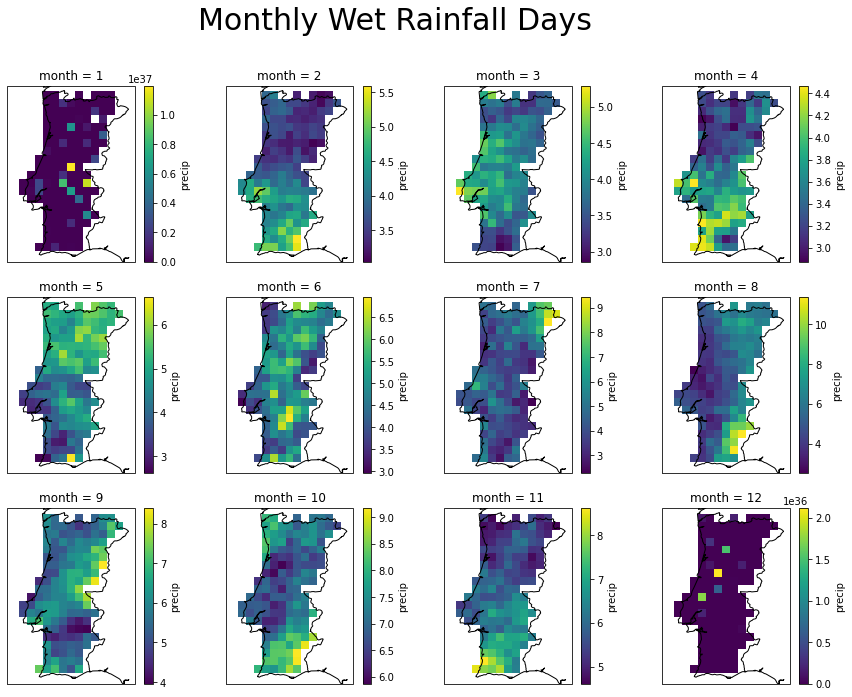

In [13]:
count=0
fig=plt.figure(figsize=(15,11))
for mon in rain1_mon.month:
    count +=1
    ax=fig.add_subplot(3,4, count,alpha=1, projection =ccrs.PlateCarree())
    rain1_mon[rain1_mon.month==mon].plot()
    ax.add_feature(cf.COASTLINE)
    ax.add_feature(cf.BORDERS)
#     ax.add_feature(cf.OCEAN)
    ax.set_extent([-6,-10, 36.8, 42.3])
fig.suptitle('Monthly Wet Rainfall Days', fontsize= 30)
fig.savefig('Monthly Spatial Wet Rainfall Days.jpeg')

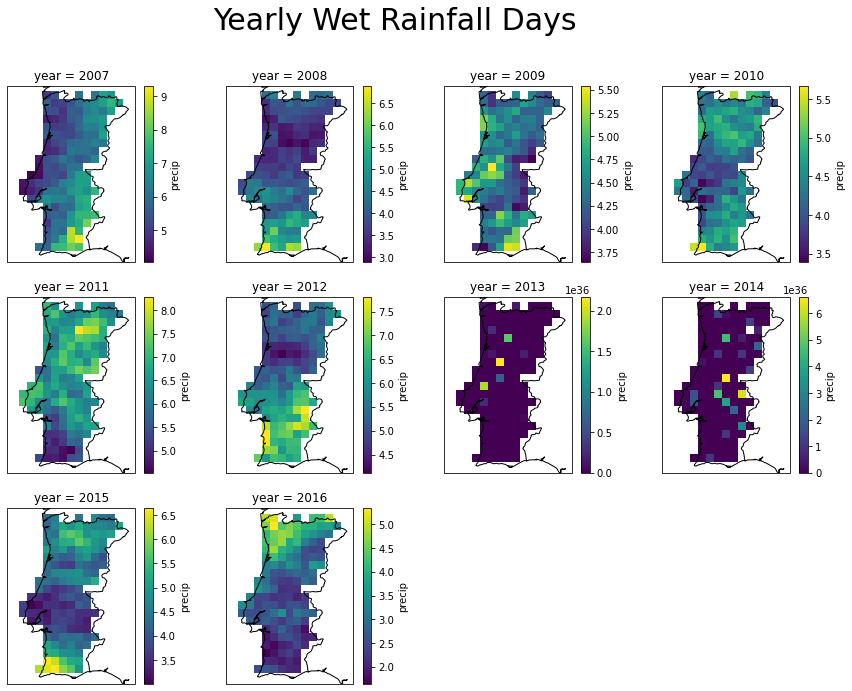

In [14]:
count=0
fig=plt.figure(figsize=(15,11))
for yr in rain1_yr.year:
    count +=1
    ax=fig.add_subplot(3,4, count, projection =ccrs.PlateCarree())
    rain1_yr[rain1_yr.year==yr].plot()
    ax.add_feature(cf.COASTLINE)
    ax.add_feature(cf.BORDERS)
#     ax.add_feature(cf.OCEAN)
    ax.set_extent([-6,-10, 36.8, 42.3])
fig.suptitle('Yearly Wet Rainfall Days', fontsize= 30)
fig.savefig('Yearly Spatial Wet Rainfall Days.jpeg')

# R<1

In [15]:
#Selecting the dry days
rain0= data_precip.where(data_precip < 1)

#grouping of data monthly and yearly basis
rain0_mon=rain0.groupby('datetime.month').mean('datetime')
rain0_yr=rain0.groupby('datetime.year').mean('datetime')

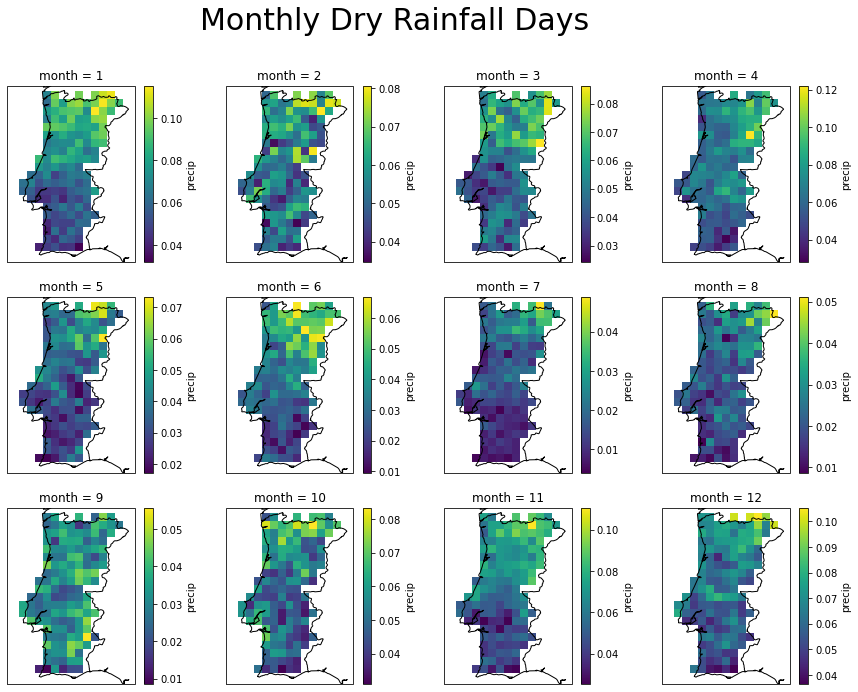

In [16]:
count=0
fig=plt.figure(figsize=(15,11))
for mon in rain0_mon.month:
    count +=1
    ax=fig.add_subplot(3,4, count, projection =ccrs.PlateCarree())
    rain0_mon[rain0_mon.month==mon].plot()
    ax.add_feature(cf.COASTLINE)
    ax.add_feature(cf.BORDERS)
#     ax.add_feature(cf.OCEAN)
    ax.set_extent([-6,-10, 36.8, 42.3])
fig.suptitle('Monthly Dry Rainfall Days', fontsize= 30)
fig.savefig('Monthly Spatial Dry Rainfall Days.jpeg')

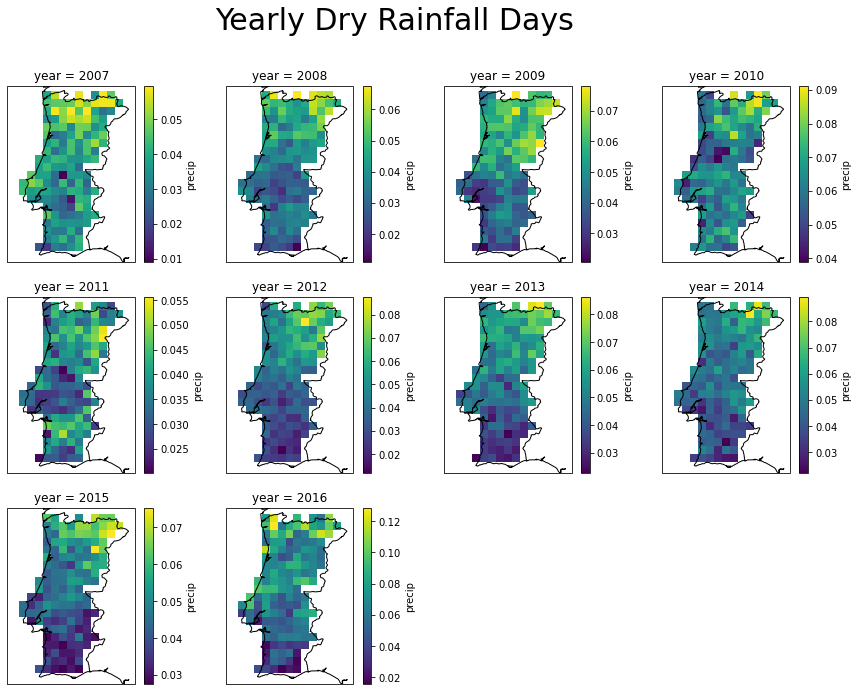

In [17]:
count=0
fig=plt.figure(figsize=(15,11))
for yr in rain0_yr.year:
    count +=1
    ax=fig.add_subplot(3,4, count, projection =ccrs.PlateCarree())
    rain0_yr[rain0_yr.year==yr].plot()
    ax.add_feature(cf.COASTLINE)
    ax.add_feature(cf.BORDERS)
#     ax.add_feature(cf.OCEAN)
    ax.set_extent([-6,-10, 36.8, 42.3])
fig.suptitle('Yearly Dry Rainfall Days', fontsize= 30)
fig.savefig('Yearly Spatial Dry Rainfall Days.jpeg')

# R> 10

In [18]:
# Selecting the R10mm days
rain10= data_precip.where(data_precip > 10)

# Grouping of data monthly and yearly basis
rain10_mon=rain10.groupby('datetime.month').mean('datetime')
rain10_yr=rain10.groupby('datetime.year').mean('datetime')

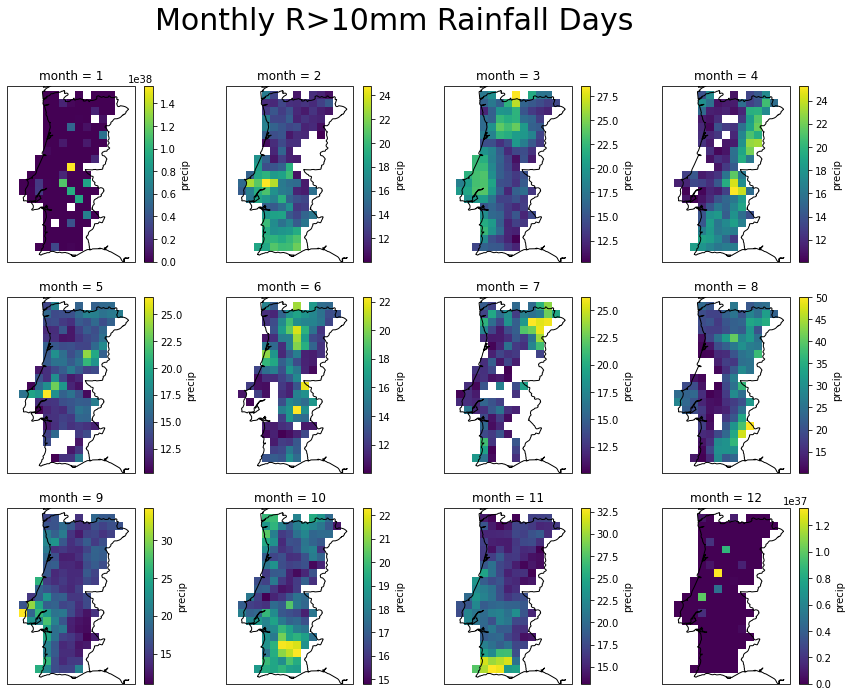

In [19]:
count=0
fig=plt.figure(figsize=(15,11))
for mon in rain10_mon.month:
    count +=1
    ax=fig.add_subplot(3,4, count, projection =ccrs.PlateCarree())
    rain10_mon[rain10_mon.month==mon].plot()
    ax.add_feature(cf.COASTLINE)
    ax.add_feature(cf.BORDERS)
#     ax.add_feature(cf.OCEAN)
    ax.set_extent([-6,-10, 36.8, 42.3])
fig.suptitle('Monthly R>10mm Rainfall Days', fontsize= 30)
fig.savefig('Monthly Spatial R10mm.jpeg')

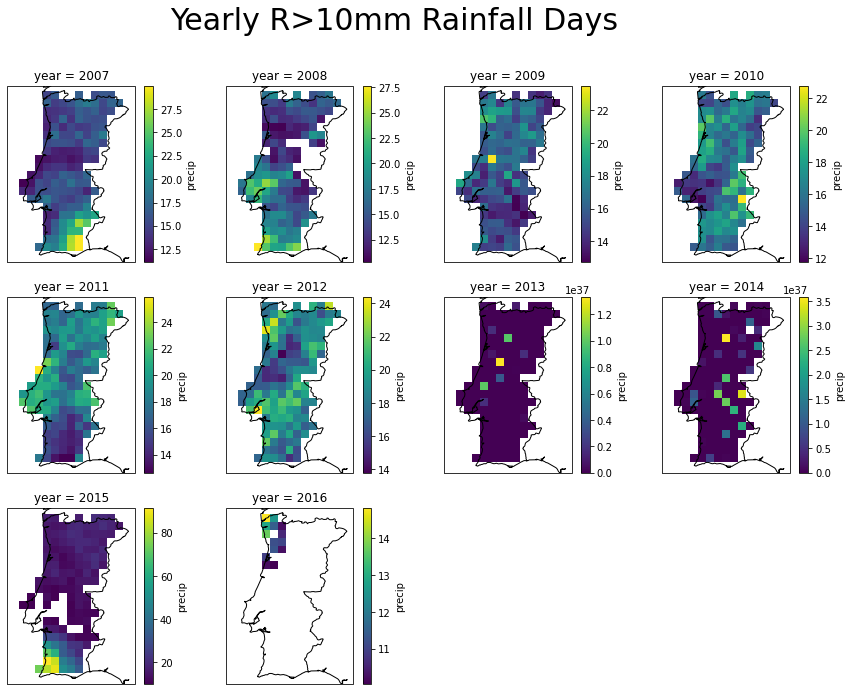

In [20]:
count=0
fig=plt.figure(figsize=(15,11))
for yr in rain10_yr.year:
    count +=1
    ax=fig.add_subplot(3,4, count, projection =ccrs.PlateCarree())
    rain10_yr[rain10_yr.year==yr].plot()
    ax.add_feature(cf.COASTLINE)
    ax.add_feature(cf.BORDERS)
#     ax.add_feature(cf.OCEAN)
    ax.set_extent([-6,-10, 36.8, 42.3])
fig.suptitle('Yearly R>10mm Rainfall Days', fontsize= 30)
fig.savefig('Yearly Spatial R10mm.jpeg')

# R>20

In [21]:
#Selecting the R20mm days
rain20= data_precip.where(data_precip > 20)

#spatial plot
rain20_mon=rain20.groupby('datetime.month').mean('datetime')
rain20_yr=rain20.groupby('datetime.year').mean('datetime')

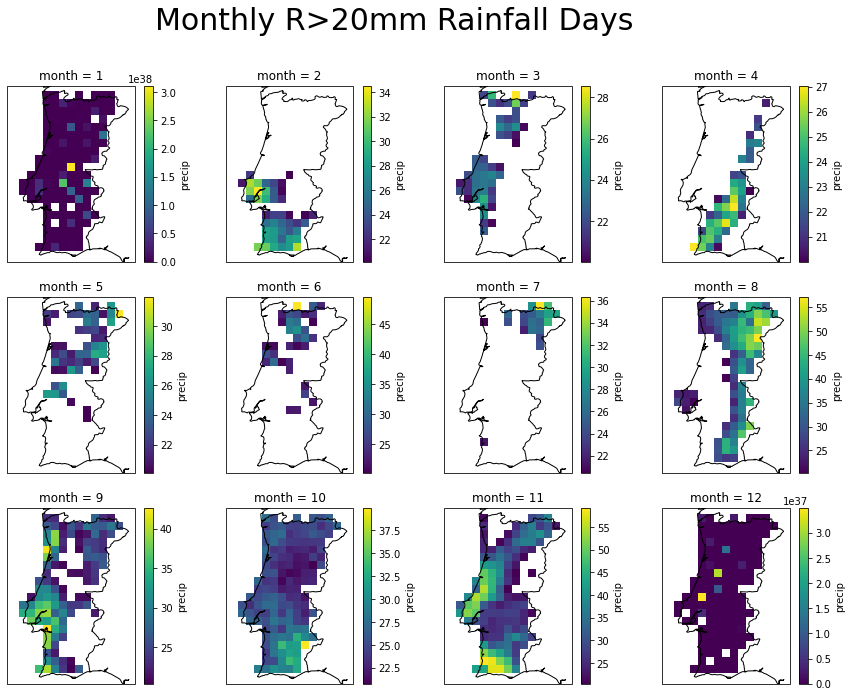

In [22]:
count=0
fig=plt.figure(figsize=(15,11))
for mon in rain20_mon.month:
    count +=1
    ax=fig.add_subplot(3,4, count, projection =ccrs.PlateCarree())
    rain20_mon[rain20_mon.month==mon].plot()
    ax.add_feature(cf.COASTLINE)
    ax.add_feature(cf.BORDERS)
#     ax.add_feature(cf.OCEAN)
    ax.set_extent([-6,-10, 36.8, 42.3])
fig.suptitle('Monthly R>20mm Rainfall Days', fontsize= 30)
fig.savefig('Monthly R20mm Rainfall Days.jpeg')

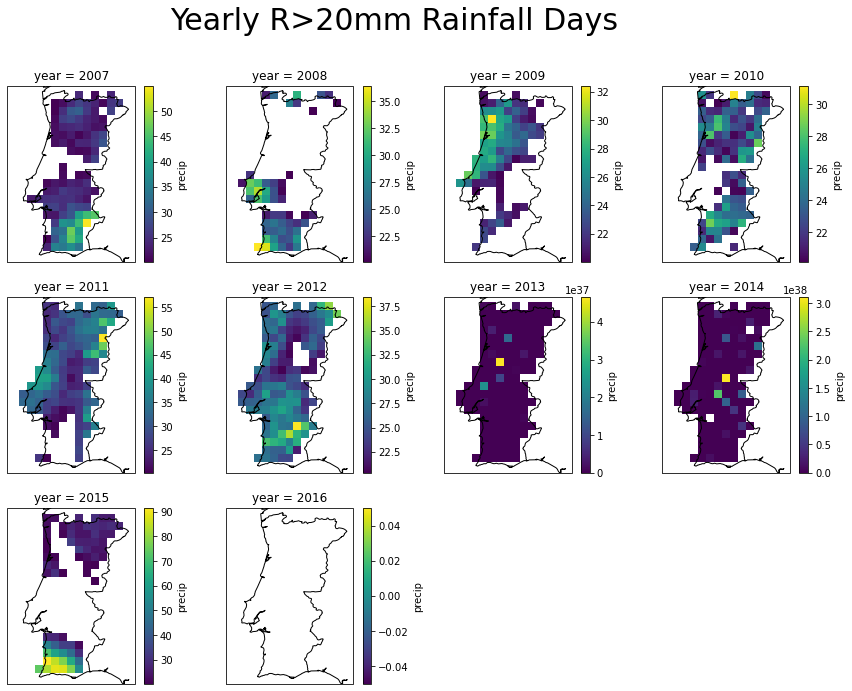

In [23]:
count=0
fig=plt.figure(figsize=(15,11))
for yr in rain20_yr.year:
    count +=1
    ax=fig.add_subplot(3,4, count, projection =ccrs.PlateCarree())
    rain20_yr[rain20_yr.year==yr].plot()
    ax.add_feature(cf.COASTLINE)
    ax.add_feature(cf.BORDERS)
#     ax.add_feature(cf.OCEAN)
    ax.set_extent([-6,-10, 36.8, 42.3])
fig.suptitle('Yearly R>20mm Rainfall Days', fontsize= 30)
fig.savefig('Yearly R20mm Rainfall Days.jpeg')

# Timeseries Plots

# R>1

In [24]:
# Selecting R>1 days
rainn1= data_precip.where(data_precip > 1)

# Grouping of data monthly and yearly basis
rainn1_mon=rainn1.groupby('datetime.month').mean('datetime')
rainn1_yr=rainn1.groupby('datetime.year').mean('datetime')

In [25]:
# Converting averaged values to dataframe
rainn1_mon_mean=rainn1_mon.mean(dim=('lon','lat'))
rainn1_mon_mean=rainn1_mon_mean.to_dataframe()

In [26]:
# replacing outliers with median values
rainn1_mon_mean['precip']=np.where(rainn1_mon_mean['precip']>6.053094e+34,rainn1_mon_mean.median(),rainn1_mon_mean['precip'])
rainn1_mon_mean['precip']=np.where(rainn1_mon_mean['precip']>4.870002e+33,rainn1_mon_mean.median(),rainn1_mon_mean['precip'])

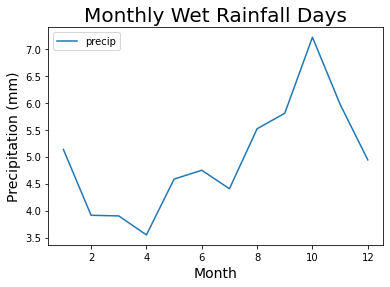

In [27]:
# timeseries plot of values
rainn1_mon_mean.plot()
plt.xlabel('Month', fontsize=14)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.title('Monthly Wet Rainfall Days', fontsize= 20)
plt.savefig('Monthly Timeseries of Wet Rainfall Days.jpeg')

In [28]:
# Converting averaged values to dataframe
rainn1_yrmean=rainn1_yr.mean(dim=('lon','lat'))
rainn1_yrmean=rainn1_yrmean.to_dataframe()

In [29]:
# replacing outliers with median values
rainn1_yrmean['precip']=np.where(rainn1_yrmean['precip']>8.053094e+34,rainn1_yrmean.median(),rainn1_yrmean['precip'])
rainn1_yrmean['precip']=np.where(rainn1_yrmean['precip']>5.024661e+33,rainn1_yrmean.median(),rainn1_yrmean['precip'])

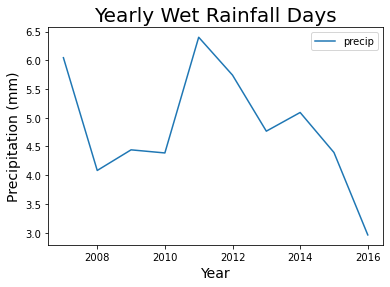

In [30]:
# timeseries plot of values
rainn1_yrmean.plot()
plt.xlabel('Year', fontsize=14)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.title('Yearly Wet Rainfall Days', fontsize= 20)
plt.savefig('Yearly Timeseries of Wet Rainfall Days.jpeg')

# R<1

In [31]:
#Selecting R<1 days
rainn0= data_precip.where(data_precip < 1)

#grouping of data monthly and yearly basis
rainn0_mon=rainn0.groupby('datetime.month').mean('datetime')
rainn0_yr=rainn0.groupby('datetime.year').mean('datetime')

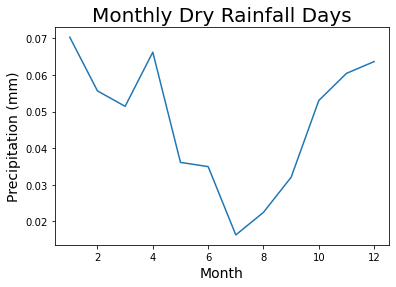

In [32]:
# timeseries plot of values
rainn0_mon.mean(dim=('lon','lat')).plot()
plt.xlabel('Month', fontsize=14)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.title('Monthly Dry Rainfall Days', fontsize= 20)
plt.savefig('Monthly Timeseries of Dry Rainfall Days.jpeg')

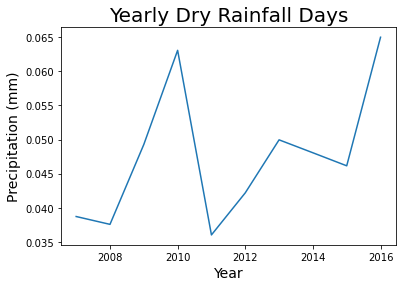

In [33]:
# timeseries plot of values
rainn0_yr.mean(dim=('lon','lat')).plot()
plt.xlabel('Year', fontsize=14)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.title('Yearly Dry Rainfall Days', fontsize= 20)
plt.savefig('Yearly Timeseries of Dry Rainfall Days.jpeg')

# R>10

In [34]:
#Selecting R>10 days
rainn10= data_precip.where(data_precip > 10)

#grouping of data monthly and yearly basis
rainn10_mon=rainn10.groupby('datetime.month').mean('datetime')
rainn10_yr=rainn10.groupby('datetime.year').mean('datetime')

In [35]:
# Converting averaged values to dataframe
rainn10_mon_mean=rainn10_mon.mean(dim=('lon','lat'))
rainn10_mon_mean=rainn10_mon_mean.to_dataframe()

In [36]:
# replacing outliers with median values
rainn10_mon_mean['precip']=np.where(rainn10_mon_mean['precip']>8.053094e+39,rainn10_mon_mean.median(),rainn10_mon_mean['precip'])
rainn10_mon_mean['precip']=np.where(rainn10_mon_mean['precip']>3.028839e+34,rainn10_mon_mean.median(),rainn10_mon_mean['precip'])

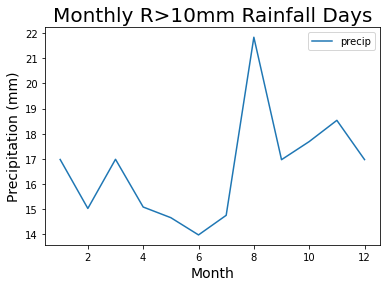

In [37]:
# timeseries plot of values
rainn10_mon_mean.plot()
plt.xlabel('Month', fontsize=14)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.title('Monthly R>10mm Rainfall Days', fontsize= 20)
plt.savefig('Monthly R10mm.jpeg')

In [38]:
# Converting averaged values to dataframe
rainn10_yrmean=rainn10_yr.mean(dim=('lon','lat'))
rainn10_yrmean=rainn10_yrmean.to_dataframe()

In [39]:
# replacing outliers with median values
rainn10_yrmean['precip']=np.where(rainn10_yrmean['precip']>8.053094e+39,rainn10_yrmean.median(),rainn10_yrmean['precip'])
rainn10_yrmean['precip']=np.where(rainn10_yrmean['precip']>3.017553e+34,rainn10_yrmean.median(),rainn10_yrmean['precip'])

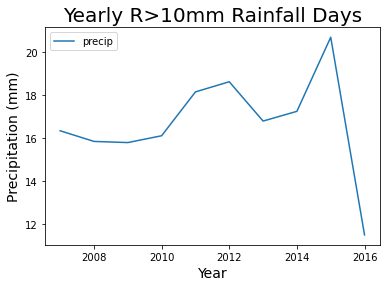

In [40]:
# timeseries plot of values
rainn10_yrmean.plot()
plt.xlabel('Year', fontsize=14)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.title('Yearly R>10mm Rainfall Days', fontsize= 20)
plt.savefig('Yearly R10mm.jpeg')

# R>20

In [41]:
#Selecting the R>20 days
rainn20= data_precip.where(data_precip > 20)

#grouping of data monthly and yearly basis
rainn20_mon=rainn20.groupby('datetime.month').mean('datetime')
rainn20_yr=rainn20.groupby('datetime.year').mean('datetime')

In [42]:
# Converting averaged values to dataframe
rainn20_mon_mean=rainn20_mon.mean(dim=('lon','lat'))
rainn20_mon_mean=rainn20_mon_mean.to_dataframe()

In [43]:
# replacing outliers with median values
rainn20_mon_mean['precip']=np.where(rainn20_mon_mean['precip']>8.053094e+39,rainn20_mon_mean.median(),rainn20_mon_mean['precip'])
rainn20_mon_mean['precip']=np.where(rainn20_mon_mean['precip']>7.327385e+34,rainn20_mon_mean.median(),rainn20_mon_mean['precip'])

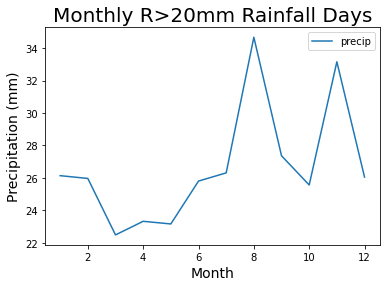

In [44]:
# timeseries plot of values
rainn20_mon_mean.plot()
plt.xlabel('Month', fontsize=14)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.title('Monthly R>20mm Rainfall Days', fontsize= 20)
plt.savefig('Monthly R20mm.jpeg')

In [45]:
# Converting averaged values to dataframe
rainn20_yrmean=rainn20_yr.mean(dim=('lon','lat'))
rainn20_yrmean=rainn20_yrmean.to_dataframe()

In [46]:
# replacing outliers with median values
rainn20_yrmean['precip']=np.where(rainn20_yrmean['precip']>9.053094e+35,rainn20_yrmean.median(),rainn20_yrmean['precip'])
rainn20_yrmean['precip']=np.where(rainn20_yrmean['precip']>7.394568e+34,rainn20_yrmean.median(),rainn20_yrmean['precip'])
rainn20_yrmean=rainn20_yrmean.fillna(rainn20_yrmean.median())

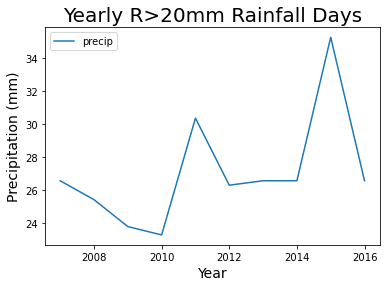

In [47]:
# timeseries plot of values
rainn20_yrmean.plot()
plt.xlabel('Year', fontsize=14)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.title('Yearly R>20mm Rainfall Days', fontsize= 20)
plt.savefig('Yearly R20mm.jpeg')